In [1]:
import numpy as np
import pandas as pd
import glob
import os
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

# Step 1

## 1. load csv to df by chosen location

1. load metadata files
2. choose location
3. if location, load the tracks (trajectory) into df's

In [4]:
# load metadata files
all_files = glob.glob(r'C:\Users\yftac\Documents\00_Project_Afeka\drone-dataset-tools-master\data\*.csv')
recordingMeta_files_list = [f for f in all_files if 'recordingMeta' in f]
# open recordingMeta files and sort by location and then extract recordingId
def check_string_in_files(files, column_name, search_string):
    matching_files = []
    for file in files:
        df = pd.read_csv(file)
        if search_string in df[column_name].values:
            matching_files.append(file)
    return matching_files
chosen_location=2
# sort by location
chosen_location_files_list_recordingMeta=check_string_in_files(recordingMeta_files_list, 'locationId', chosen_location)
chosen_location_files_list_recordingMeta

['C:\\Users\\yftac\\Documents\\00_Project_Afeka\\drone-dataset-tools-master\\data\\18_recordingMeta.csv',
 'C:\\Users\\yftac\\Documents\\00_Project_Afeka\\drone-dataset-tools-master\\data\\19_recordingMeta.csv',
 'C:\\Users\\yftac\\Documents\\00_Project_Afeka\\drone-dataset-tools-master\\data\\20_recordingMeta.csv',
 'C:\\Users\\yftac\\Documents\\00_Project_Afeka\\drone-dataset-tools-master\\data\\21_recordingMeta.csv',
 'C:\\Users\\yftac\\Documents\\00_Project_Afeka\\drone-dataset-tools-master\\data\\22_recordingMeta.csv',
 'C:\\Users\\yftac\\Documents\\00_Project_Afeka\\drone-dataset-tools-master\\data\\23_recordingMeta.csv',
 'C:\\Users\\yftac\\Documents\\00_Project_Afeka\\drone-dataset-tools-master\\data\\24_recordingMeta.csv',
 'C:\\Users\\yftac\\Documents\\00_Project_Afeka\\drone-dataset-tools-master\\data\\25_recordingMeta.csv',
 'C:\\Users\\yftac\\Documents\\00_Project_Afeka\\drone-dataset-tools-master\\data\\26_recordingMeta.csv',
 'C:\\Users\\yftac\\Documents\\00_Project_Afek

In [5]:
recordingId_list=[]
file_name_tracks_list=[]
file_name_tracksMeta_list=[]

# load the names and change to the tracks and tracksMeta file names to cretae file lists of all csv files
for file_path in chosen_location_files_list_recordingMeta:
    # replace name with tracks and tracksMeta
    file_name_tracks=file_path.replace('recordingMeta','tracks')
    file_name_tracksMeta=file_path.replace('recordingMeta','tracksMeta')
    # appen to lists
    file_name_tracks_list.append(file_name_tracks)
    file_name_tracksMeta_list.append(file_name_tracksMeta)
    # create a recordingId list for the "chosen_location"
    file_name='df_'+ os.path.basename(file_name_tracks)
    recordingId=file_name.split("_")[1]
    recordingId_list.append(recordingId)

print("recordingId_list:", recordingId_list, "\n")
# print("tracks files: \n",file_name_tracks_list)
# print("tracksMeta files: \n",file_name_tracksMeta_list)
print("tracks:\n", "\n".join(map( str, file_name_tracks_list)), "\n")
print("tracksMeta:\n", "\n".join(map(str, file_name_tracksMeta_list)))

recordingId_list: ['18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29'] 

tracks:
 C:\Users\yftac\Documents\00_Project_Afeka\drone-dataset-tools-master\data\18_tracks.csv
C:\Users\yftac\Documents\00_Project_Afeka\drone-dataset-tools-master\data\19_tracks.csv
C:\Users\yftac\Documents\00_Project_Afeka\drone-dataset-tools-master\data\20_tracks.csv
C:\Users\yftac\Documents\00_Project_Afeka\drone-dataset-tools-master\data\21_tracks.csv
C:\Users\yftac\Documents\00_Project_Afeka\drone-dataset-tools-master\data\22_tracks.csv
C:\Users\yftac\Documents\00_Project_Afeka\drone-dataset-tools-master\data\23_tracks.csv
C:\Users\yftac\Documents\00_Project_Afeka\drone-dataset-tools-master\data\24_tracks.csv
C:\Users\yftac\Documents\00_Project_Afeka\drone-dataset-tools-master\data\25_tracks.csv
C:\Users\yftac\Documents\00_Project_Afeka\drone-dataset-tools-master\data\26_tracks.csv
C:\Users\yftac\Documents\00_Project_Afeka\drone-dataset-tools-master\data\27_tracks.csv
C:\Users\yftac\Doc

**Now with a list of the file names and paths, for track and metadata for the chosen location:**<br>
| 📝 variable name                            | 💡 Description    |
| -----------                                       | -----------   |
| recordingId_list                                  | recordingId   |
| file_name_track_list                              | tracks        |
| file_name_tracksMeta_list                         | tracksMeta    |
| chosen_location_files_list_recordingMeta          | recordingMeta |


Create tracks dataframes:

In [6]:

def create_df_from_csv(file_path_list, recordingId_list):
    dataframes={}
    for i in range(len(file_path_list)):
        print(f"csv with id={recordingId_list[i]} loaded")
        df=pd.read_csv(file_path_list[i])
        dataframes[i]=df
    return dataframes

print("Load tracks from file_name_tracks_list:")
dfs_tracks = create_df_from_csv(file_name_tracks_list, recordingId_list)
print("---- all csv loaded, dataframes created in 'dfs_tracks' ----\n")
print("Load tracksMeta from file_name_tracksMeta_list:")
dfs_tracksMeta = create_df_from_csv(file_name_tracksMeta_list, recordingId_list)
print("---- all csv loaded, dataframes created in 'dfs_tracksMeta' ----\n")
    

Load tracks from file_name_tracks_list:
csv with id=18 loaded
csv with id=19 loaded
csv with id=20 loaded
csv with id=21 loaded
csv with id=22 loaded
csv with id=23 loaded
csv with id=24 loaded
csv with id=25 loaded
csv with id=26 loaded
csv with id=27 loaded
csv with id=28 loaded
csv with id=29 loaded
---- all csv loaded, dataframes created in 'dfs_tracks' ----

Load tracksMeta from file_name_tracksMeta_list:
csv with id=18 loaded
csv with id=19 loaded
csv with id=20 loaded
csv with id=21 loaded
csv with id=22 loaded
csv with id=23 loaded
csv with id=24 loaded
csv with id=25 loaded
csv with id=26 loaded
csv with id=27 loaded
csv with id=28 loaded
csv with id=29 loaded
---- all csv loaded, dataframes created in 'dfs_tracksMeta' ----



In [7]:
# print dataframes info
def print_df_info(dfs_tracks, dfs_tracksMeta, recordingId_list):
    x = int(recordingId_list[0])
    for i in range(len(dfs_tracks)):
        print(f"df{i+x}")
        print('tracks')
        print(dfs_tracks[i].info())
        print('\ntracksMeta')
        print(dfs_tracksMeta[i].info())
        print('\n /////////////////////////////////////////////////////// \n')
print_df_info(dfs_tracks, dfs_tracksMeta, recordingId_list)

df18
tracks
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625989 entries, 0 to 625988
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   recordingId      625989 non-null  int64  
 1   trackId          625989 non-null  int64  
 2   frame            625989 non-null  int64  
 3   trackLifetime    625989 non-null  int64  
 4   xCenter          625989 non-null  float64
 5   yCenter          625989 non-null  float64
 6   heading          625989 non-null  float64
 7   width            625989 non-null  float64
 8   length           625989 non-null  float64
 9   xVelocity        625989 non-null  float64
 10  yVelocity        625989 non-null  float64
 11  xAcceleration    625989 non-null  float64
 12  yAcceleration    625989 non-null  float64
 13  lonVelocity      625989 non-null  float64
 14  latVelocity      625989 non-null  float64
 15  lonAcceleration  625989 non-null  float64
 16  latAcceleration  625989 no

## Merge tracks and tracksMeta

merge the data so we can have all features required for the ttc calculatino.
the following figure explains:

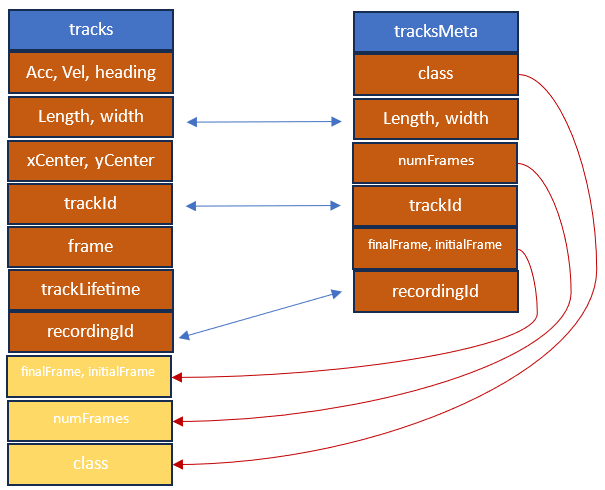

Remove: Acceleration features since they are not neccessary for ttc calc nor predictions. 
<br> Remove: Lat an Lon Velocitys.
<br> Save to .csv

In [8]:
# define the common columns 
common_columns = ['trackId', 'recordingId', 'width', 'length']
columns_to_remove = ['lonVelocity','latVelocity','xAcceleration', 'yAcceleration', 'lonAcceleration', 'latAcceleration']
# make sure we in the 'root' directory
root_dir = r"C:\Users\yftac\Documents\00_Project_Afeka\ttc_calculation"
os.chdir(root_dir)

def merge_dfs_tracks_trackMeta(dfs_tracks, dfs_tracksMeta, common_columns, recordingId_list, columns_to_remove):
    
    # create folder to save files 
    folder_name='01_merged_tracks_tracksMeta_data'
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    # change to working dir
    os.chdir(folder_name)
    
    # initialize a list of the merged files to return by the function
    file_name_merged_tracks_tracksMeta_list=[]

    # iterate dfs for each df and combine
    for x in tqdm(range(len(dfs_tracks)), desc="Merging 'tracks' with 'tracksMeta'"):
        # merge tracks with tracksMeta
        df_merged = dfs_tracks[x].merge(dfs_tracksMeta[x], on=common_columns)
        # remove columns
        df_merged=df_merged.drop(columns=columns_to_remove)
        # save as CSV file
        file_name=str(recordingId_list[x]) + '_merged_tracks_tracksMeta' + '.csv'
        df_merged.to_csv(file_name, index=False)
        # append the file name to the list
        file_name_merged_tracks_tracksMeta_list.append(file_name)
        
    current_dir = os.getcwd()
    print(f"files saved to: {current_dir}")
    # change back to parent directory
    os.chdir('..')

    return file_name_merged_tracks_tracksMeta_list

file_name_merged_tracks_tracksMeta_list=merge_dfs_tracks_trackMeta(dfs_tracks, dfs_tracksMeta, common_columns, recordingId_list, columns_to_remove)

Merging 'tracks' with 'tracksMeta': 100%|██████████| 12/12 [00:49<00:00,  4.12s/it]

files saved to: C:\Users\yftac\Documents\00_Project_Afeka\ttc_calculation\01_merged_tracks_tracksMeta_data


**Now we have also a combined file of tracks with its Meta**<br>
| 📝 variable name                            | 💡 Description    |
| -----------                                       | -----------   |
| recordingId_list                                  | recordingId   |
| file_name_track_list                              | tracks        |
| file_name_tracksMeta_list                         | tracksMeta    |
| chosen_location_files_list_recordingMeta          | recordingMeta |
| file_name_merged_tracks_tracksMeta_list           | tracks+tracksMeta|
